# Controlo PID de sistemas térmicos

O objetivo do trabalho é controlar a temperatura do sistema SERT usando um controlador proporcional, integral e derivativo (**PID**). 

## 1. Introdução
Uma primeira abordagem ao controlo poderá ser usar um simples controlador ON/OFF onde o sistema está totalmente a ON quando o erro é positivo (máxima potência) e totalmente a OFF quando o erro é negativo (potência nula). Uma abordagem mais adequada para o controlo é modular a potência do sistema na proporção do erro de temperatura existente e/ou da integral do erro e/ou da derivada do erro. Ou seja, se o sistema estiver a uma temperatura muita baixa (erro elevado), o sistema é colocado a ON durante mais tempo (mais potência), mas se este estiver a uma temperatura não tão baixa (erro mais pequeno), coloca-se o sistema durante menos tempo em ON (menos potência). Um tipo de controlador que fornece a soma de três ações de controlo, nomeadamente a ação proporcional ($P$), a ação integral ($I$) e a ação derivativa ($D$), é o chamado controlo Proporcional, Integral e Derivativo, ou simplesmente controlo **PID**. Matematicamente, é expresso por:

$$ u(t)=K_p\left(e(t) + \frac{1}{T_i}\int_{0}^{t}e(\tau) d\tau+T_d\frac{de(t)}{dt} \right) \tag{1} $$

em que $K_p$ é o ganho proporcional, $T_i$ a constante de tempo integral, e $T_d$ a constante de tempo derivativa. 

Uma outra forma de representar um controlador PID é dada por:

$$ u(t)=K_p e(t) + K_i\int_{0}^{t}e(\tau) d\tau + K_d\frac{de(t)}{dt} = P(t) + I(t) + D(t) \tag{2} $$

onde $K_i=K_p⁄T_i$ é o ganho integral e $K_d=K_p T_d$ o ganho derivativo. $P$, $I$ e $D$ são respetivamente os termos proporcional, integral e derivativo. Embora as duas formas (1) e (2) sejam equivalentes, os valores dos parâmetros são muito diferentes.

A correspondente função de transferência do controlador **PID** é:

$$ C(s)=\frac{U(s)}{E(s)} = K_p\left(1 + \frac{1}{T_i s} + T_d s \right) = K_p + \frac{K_i}{s} + K_d s \tag{3} $$

## 2. Controlo do Sistema Térmico
Considere para as experiências seguintes uma temperatura de referência de $T_{ref}=50$ °C e um período de amostragem de $T=1$ s. 

### 2.1 Controlo P
Um tipo de controlador em que o sinal de controlo é proporcional ao erro da temperatura é o chamado controlo Proporcional ou controlo **P**. Este pode ser obtido através da equação (2) colocando os parâmetros $K_i=K_d=0$, resultando:

$$ u(t) = K_p e(t) $$

O algoritmo de controlo do controlador **P** é dado por:

$$ v(k) = K_p e(k)$$
$$ u(k) = sat(v(k),u_{min},u_{max})$$

em que $sat(\cdot )$ é a função de saturação que adapta os valores do sinal de controlo para os limites do atuador, $u_{min}$ e $u_{max}$. 

A figura seguinte apresenta o diagrama de blocos do sistema em malha fechada com um controlador **P**.

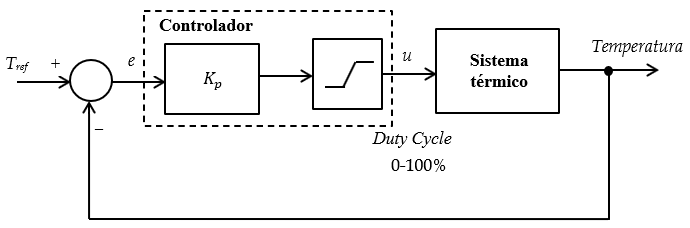

Para as experiências com o controlador **P** utilize o sistema térmico 1 (sensor `S1`) do SERT. Neste caso, efetue o controlo do sistema durante um tempo de $t_{final}=200$ s. 

#### Ponto 1
Obtenha o comportamento do sistema **SERT** com um controlador **P** para o seguinte conjunto de quatro valores arbitrários para o ganho proporcional: $K_p=1,5,10,20$.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import odeint


def modelo(y, t, u, k, tau):
    dydt = -(y-yinit)/tau + (k/tau)*u
    return dydt


############################### Código usado no guiao 1 #######################################
###############################################################################################
###############################################################################################
###############################################################################################
# Carregar os dados do arquivo para análise
data = np.loadtxt('dados_S1.txt', delimiter=',', skiprows=1)

# Extrair os dados de tempo, entrada PWM e temperatura/y
tempo_S1 = data[:, 0]
pwm_S1 = data[:, 1]
temperatura_S1 = data[:, 2]

# Para se obter T0, basta pegar no primeiro valor dos dados experimentais obtidos para S1.
T0_S1 = temperatura_S1[0]
print(f"Temperatura inicial = {T0_S1} °C")
# Para se obter Tss, basta pegar no último valor dos dados experimentais obtidos para S1, já que temos a certeza que o mesmo pertence á temperatura estabilizada.
Tss_S1 = temperatura_S1[len(temperatura_S1)-1]
print(f"Temperatura estabilizada = {Tss_S1} °C")
# Para se obter ΔT, basta subtrair a temperatura estabilizada pela temperatura inicial.
ΔT_S1 = Tss_S1 - T0_S1
print(f"ΔT_S1 = {ΔT_S1}")
# Para se obter K, usamos ΔT/Δu (diferença entre a temperatura estabilizada e a temperatura inicial dividido por  variação do sinal de entrada). 
############################################ VER ISTO QUANDO METO 0.5 e 1 ############################################
Δu_S1 = 50
K_S1 = ΔT_S1/Δu_S1
print(f"K = {K_S1}")
# Para se obter τ
y63 = ΔT_S1*0.632 + T0_S1
print("T_63% = ", y63)
# Interpolação para se obter o valor de τ (tau)
f = interp1d(temperatura_S1, tempo_S1)
τ_S1 = f(y63)
print(f"τ = {τ_S1} s")
###############################################################################################
###############################################################################################
###############################################################################################

Kp = [1, 5, 10, 20]               # ganho do controlador proporcional (P)

# Loop para cada valor de Kp
for k in range(len(Kp)):
        # Parametros do controlador PID
    Ts = 1                            # Período de amostragem em segundos
    tf = 200.0                        # tempo final
    n = int(np.round(tf/Ts+1))        # Número de amostras para a constante de tempo
    K_S1                              # Ganho do sistema
    τ_S1                              # tau do sistema
    t = np.linspace(0,tf,n)           # vetor tempo

    # entrada de referencia
    yref = np.ones(n)*50              # referência constante de 50 graus Celsius
    yinit = T0_S1                             # temperatura inicial

    # guardar/inicialização das variáveis
    u = np.zeros(n)                   # saída de controlo
    y = np.ones(n)*T0_S1              # saída do sistema
    e = np.zeros(n)                   # erro



    for i in range(0,n-1):
        # cálculo do erro
        e[i] = yref[i] - y[i]

        # cálculo do sinal de controlo P
        u[i] = Kp[k]*e[i]

        # saturação do sinal de controlo
        if u[i] > 100.0:
            u[i] = 100.0
        if u[i] < 0.0:
            u[i] = 0.0

        # simulação processo
        tint = [t[i],t[i+1]]
        ys = odeint(modelo, y[i], tint, args=(u[i],K_S1,τ_S1))
        #ys = odeint(modelo, y[i], tint, args=(u[i],K_S1,τ_S1))
        #y0 = ys[-1] # condição inicial para a próxima simulação
        y[i+1] = ys[-1] # guarda saída do sistema
    u[n-1] = u[n-2]




Temperatura inicial = 27.7 °C
Temperatura estabilizada = 56.05 °C
ΔT_S1 = 28.349999999999998
K = 0.567
T_63% =  45.6172
τ = 105.6344 s


C:\Users\ruijs\AppData\Local\Temp\ipykernel_14184\2642066219.py:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i+1] = ys[-1] # guarda saída do sistema


**a)**

Apresente as curvas de resposta da temperatura do sistema térmico e dos correspondentes sinais de controlo ($u$, em termos do *Duty Cycle*) para os vários valores do ganho $K_p$ considerados. Mostre também um gráfico do erro $e$ ao longo do tempo entre a temperatura de referência $T_{ref}$ e a temperatura atual do sistema.

C:\Users\ruijs\AppData\Local\Temp\ipykernel_14184\997480760.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i+1] = ys[-1] # guarda saída do sistema


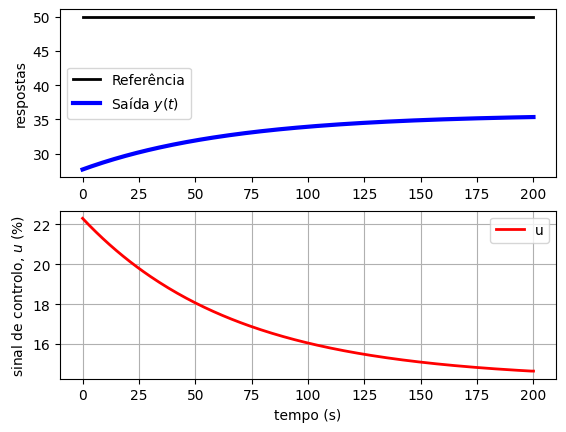

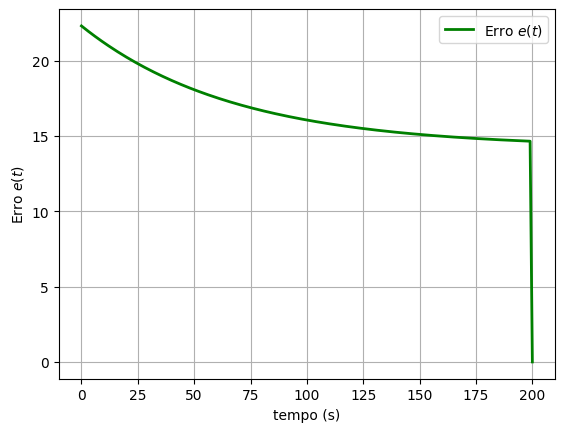

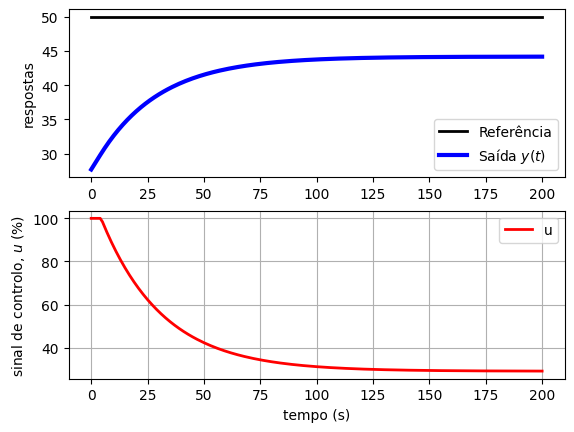

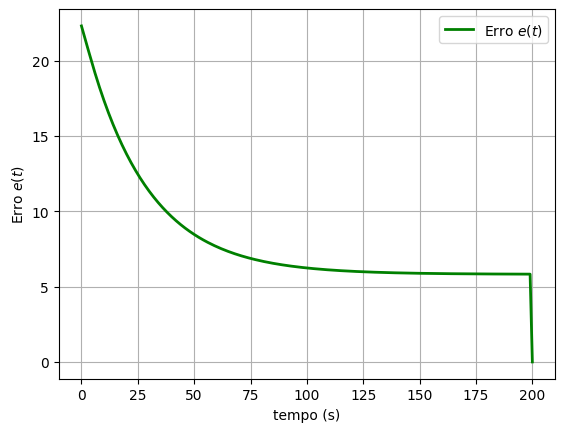

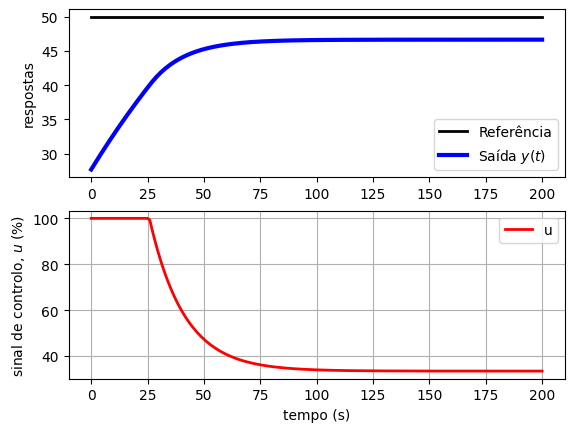

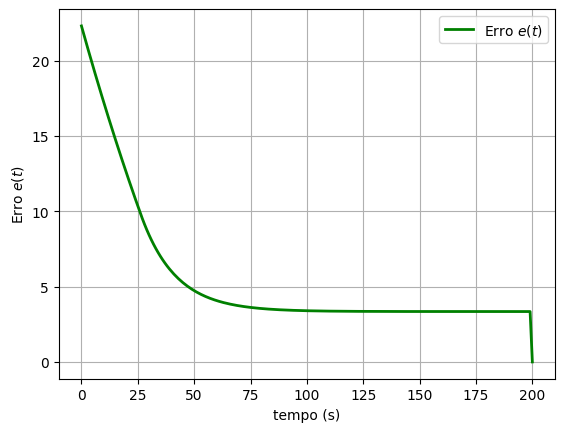

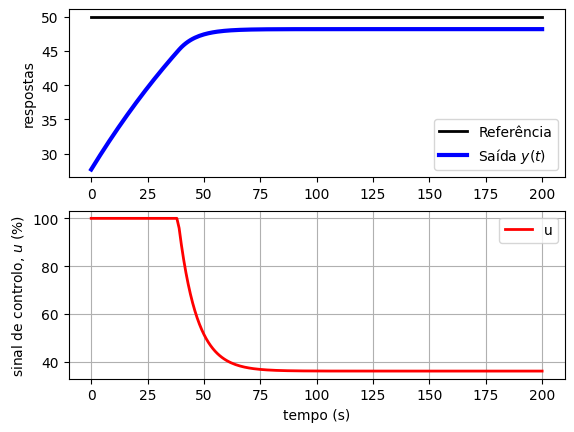

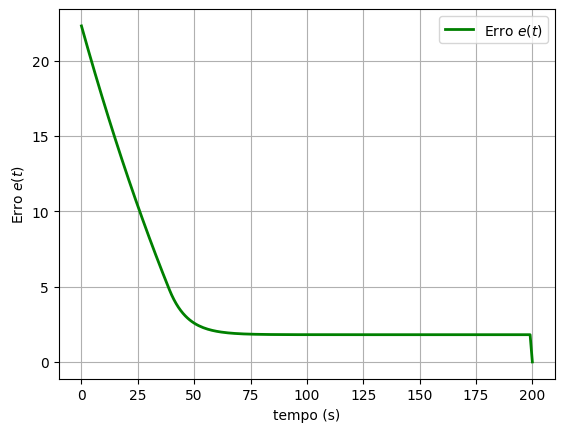

In [38]:

Kp = [1, 5, 10, 20]               # ganho do controlador proporcional (P)

for k in range(len(Kp)):
    # Parametros do controlador PID
    Ts = 1                            # Período de amostragem em segundos
    tf = 200.0                        # tempo final
    n = int(np.round(tf/Ts+1))        # Número de amostras para a constante de tempo
    K_S1                              # Ganho do sistema
    τ_S1                              # tau do sistema
    t = np.linspace(0,tf,n)           # vetor tempo

    # entrada de referencia
    yref = np.ones(n)*50              # referência constante de 50 graus Celsius
    yinit = T0_S1                             # temperatura inicial

    # guardar/inicialização das variáveis
    u = np.zeros(n)                   # saída de controlo
    y = np.ones(n)*T0_S1              # saída do sistema
    e = np.zeros(n)                   # erro


    for i in range(0,n-1):
        # cálculo do erro
        e[i] = yref[i] - y[i]

        # cálculo do sinal de controlo P
        u[i] = Kp[k]*e[i]

        # saturação do sinal de controlo
        if u[i] > 100.0:
            u[i] = 100.0
        if u[i] < 0.0:
            u[i] = 0.0

        # simulação processo
        tint = [t[i],t[i+1]]
        ys = odeint(modelo, y[i], tint, args=(u[i],K_S1,τ_S1))
        #ys = odeint(modelo, y[i], tint, args=(u[i],K_S1,τ_S1))
        #y0 = ys[-1] # condição inicial para a próxima simulação
        y[i+1] = ys[-1] # guarda saída do sistema
    u[n-1] = u[n-2]


    # graficos
    plt.figure()

    # saída y
    ax = plt.subplot(2,1,1)
    ax.grid()
    plt.plot(t,yref,'k-', linewidth=2, label='Referência')
    plt.plot(t,y,'b-', linewidth=3, label='Saída $y(t)$')
    plt.ylabel('respostas')
    plt.legend(loc = 'best')
    plt.grid()

    # controlo u
    ax = plt.subplot(2,1,2)
    ax.grid()
    plt.plot(t,u,'r-',linewidth=2,label='u')
    plt.ylabel('sinal de controlo, $u$ (%)')
    plt.xlabel('tempo (s)')
    plt.legend(loc='best')
    plt.show()

    # gráfico do erro e
    plt.figure()
    plt.plot(t, e, 'g-', linewidth=2, label='Erro $e(t)$')
    plt.xlabel('tempo (s)')
    plt.ylabel('Erro $e(t)$')
    plt.legend(loc='best')
    plt.grid()
    plt.show()



**b)**

As curvas de temperatura apresentam o comportamento desejado? Refira-se tanto ao comportamento transitório como ao do regime permanente. Justifique considerando os vários valores do ganho $K_p$ utilizados e na análise dos seguintes parâmetros:
* Valores do erro em regime permanente do sistema, $e_{ss}$
* Sinais de controlo, $u$ 

In [39]:
# Insira os comentários AQUI

# Obeservação aos gráficos:
# Concluimos que as curvas de temperatura apresentam o comportamento esperdado, porque:
# À medida que o ganho proporcional aumenta (Kp), a resposta do sistema torna-se mais rápida, ou seja, o tempo de subida diminui e os valores do erro em regime permanente também diminuem.
# O ganho proporcional ajusta a intensidade do sinal de controlo em resposta ao erro, controlando a rapidez e intensidade com que o sistema reage ao desvio em relação à referência.

# No nosso caso podemos ver ainda era necessario usar valores de Kp para fazer com que o valor de y(t) se aproximasse do valor de referência de 50 graus Celsius.


# AVISO:
# Vale apontar que, o aumento exagerado do ganho proporcional (Kp) também aumenta a sobrelevação e a oscilação do sistema, o que pode ser prejudicial para o sinais de controlo e para a resposta do sistema.

#### Ponto 2
Simule o sistema de controlo em malha fechada da temperatura usando um o controlador **P**, $C(s)=K_p$, conforme representado na figura seguinte. 

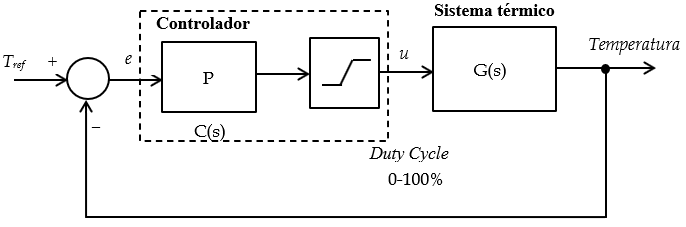

Para isso, utilize o modelo de primeira ordem identificado no Guião do Trabalho No. 1, com a função de transferência:

$$ G(s)=\frac{Y(s)}{U(s)}=\frac{K}{τs+1} $$

e os parâmetros $(K,\tau)$ identificados do sistema SERT (sensor `S1`). 

A correspondente equação diferencial é dada por:

$$ \tau \frac{dy(t)}{dt} + y(t) = K u(t)$$ 

**a)**

Apresente as curvas de resposta da temperatura do sistema simulado e dos correspondentes sinais de controlo ($u$) para os ganhos do controlador **P** considerados no **Ponto 1**: $K_p=1,5,10,20$. Mostre também um gráfico do erro ao longo do tempo entre a referência de temperatura $T_{ref}$ e a temperatura simulada do sistema.

C:\Users\ruijs\AppData\Local\Temp\ipykernel_14184\787640290.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i + 1] = odeint(modelo, y[i], tspan, args=(u[i], K, tau))[-1]


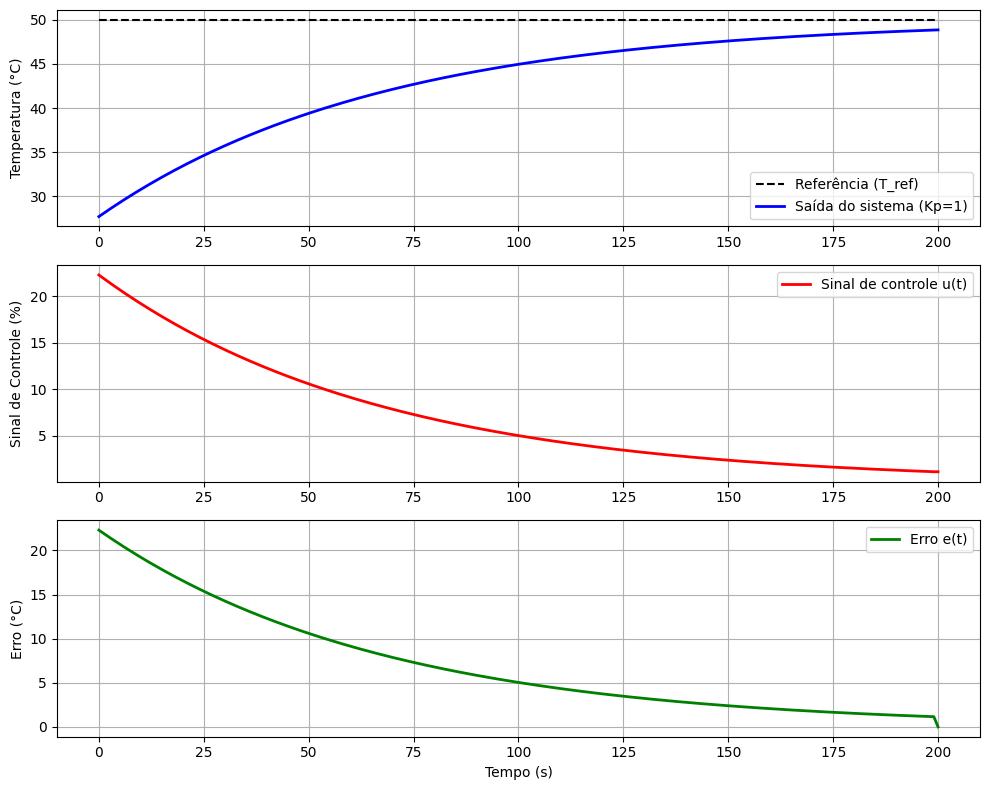

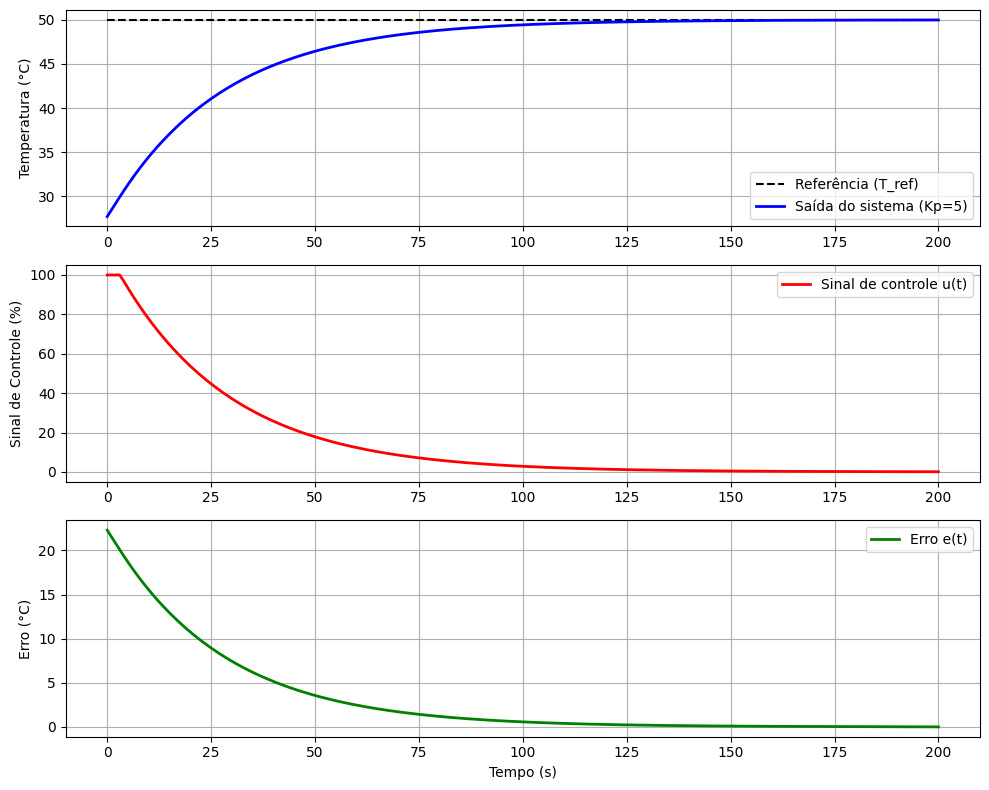

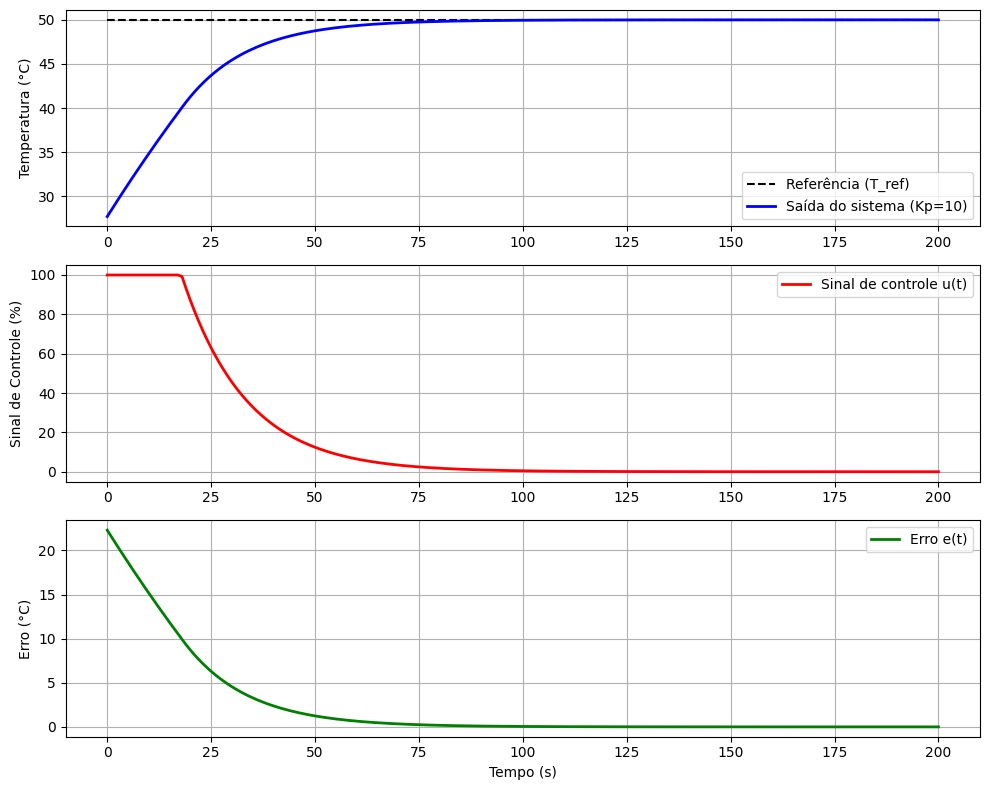

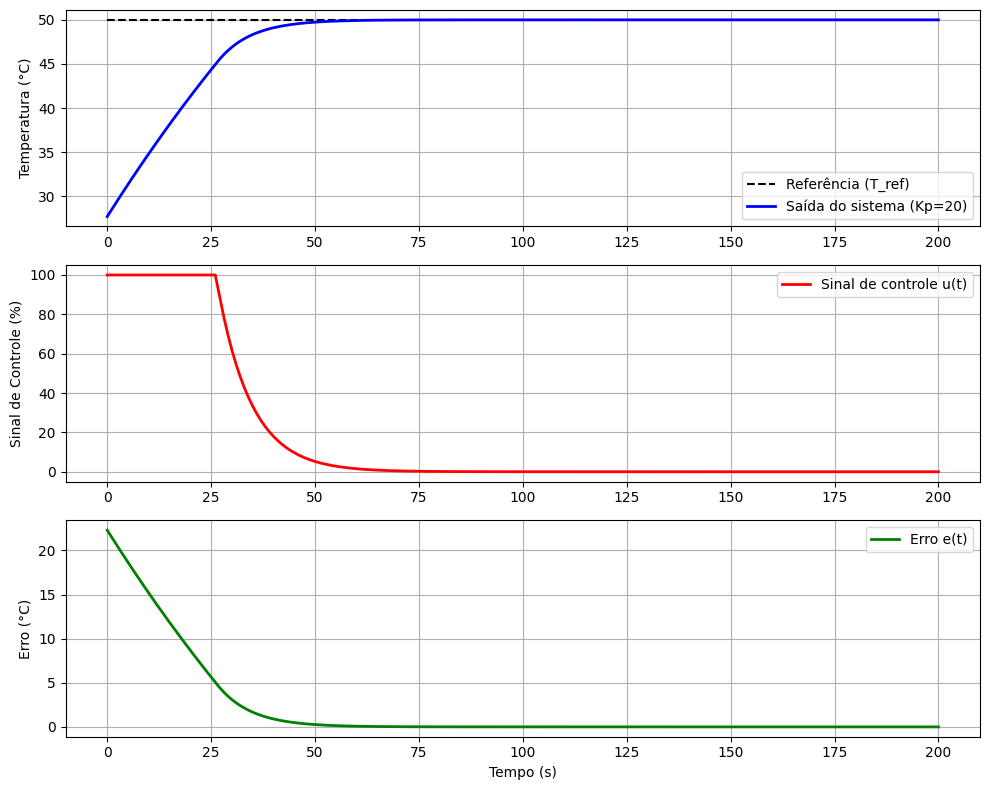

In [40]:
# Coloque o código AQUI

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parâmetros do sistema
K = K_S1           # Ganho do sistema, obtido no Ponto 1
tau = τ_S1         # Constante de tempo do sistema, obtida no Ponto 1
T_ref = 50         # Temperatura de referência
T_final = 200      # Tempo total da simulação em segundos
T_s = 1            # Período de amostragem
n = int(np.round(T_final / T_s + 1))  # Número de amostras

# Valores de Kp para o controlador
Kp_values = [1, 5, 10, 20]

# Função que descreve o modelo de primeira ordem
def modelo(y, t, u, K, tau):
    dydt = -(y - T_ref) / tau + (K / tau) * u
    return dydt

# Loop para simular para cada valor de Kp
for Kp in Kp_values:
    # Inicializar variáveis
    t = np.linspace(0, T_final, n)
    y = np.zeros(n)
    u = np.zeros(n)
    e = np.zeros(n)

    # Condição inicial
    y[0] = T0_S1
    
    # Simulação em malha fechada
    for i in range(0, n - 1):
        # Calcular erro
        e[i] = T_ref - y[i]
        
        # Controlador P
        u[i] = Kp * e[i]
        
        # Saturação do controle
        u[i] = min(100, max(0, u[i]))
        
        # Integrar o modelo diferencial
        tspan = [t[i], t[i + 1]]
        y[i + 1] = odeint(modelo, y[i], tspan, args=(u[i], K, tau))[-1]
    
    # Último valor do sinal de controle
    u[-1] = u[-2]
    
    # Plotar a resposta do sistema para o Kp atual
    plt.figure(figsize=(10, 8))
    
    # Subplot 1: Temperatura e referência
    plt.subplot(3, 1, 1)
    plt.plot(t, np.ones(n) * T_ref, 'k--', label='Referência (T_ref)')
    plt.plot(t, y, 'b-', linewidth=2, label=f'Saída do sistema (Kp={Kp})')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.grid()

    # Subplot 2: Sinal de controle u(t)
    plt.subplot(3, 1, 2)
    plt.plot(t, u, 'r-', linewidth=2, label='Sinal de controle u(t)')
    plt.ylabel('Sinal de Controle (%)')
    plt.legend()
    plt.grid()
    
    # Subplot 3: Erro
    plt.subplot(3, 1, 3)
    plt.plot(t, e, 'g-', linewidth=2, label='Erro e(t)')
    plt.ylabel('Erro (°C)')
    plt.xlabel('Tempo (s)')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()



**b)**

Compare as curvas de simulação (temperatura e sinal de controlo) obtidas em **a)** com as respostas experimentais do **Ponto 1**. Comente eventuais diferenças existentes entre ambas as respostas. 

C:\Users\ruijs\AppData\Local\Temp\ipykernel_14184\1328514136.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i + 1] = odeint(modelo, y[i], tspan, args=(u[i], K, tau))[-1]
C:\Users\ruijs\AppData\Local\Temp\ipykernel_14184\1328514136.py:89: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y2[i + 1] = odeint(modelo2, y2[i], tspan, args=(u2[i], K, tau))[-1]


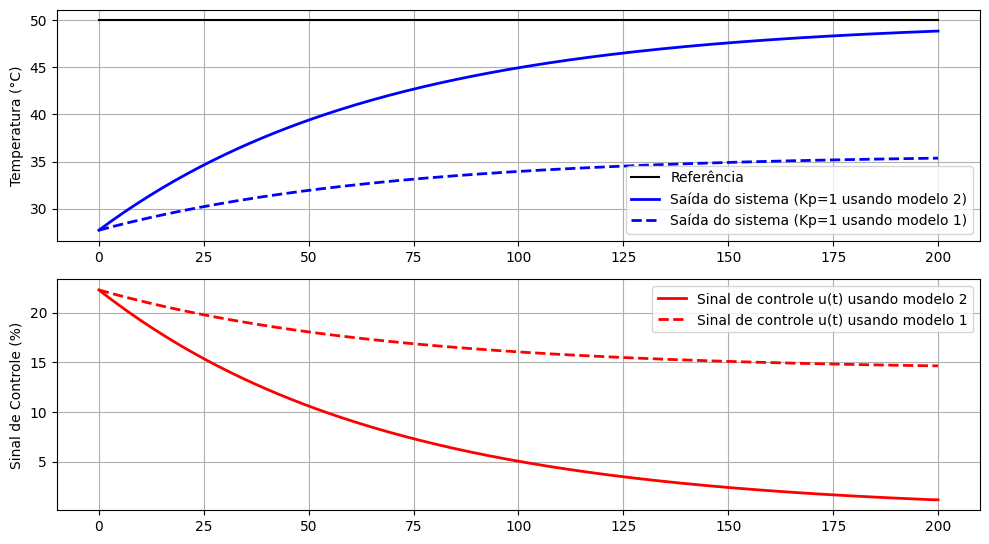

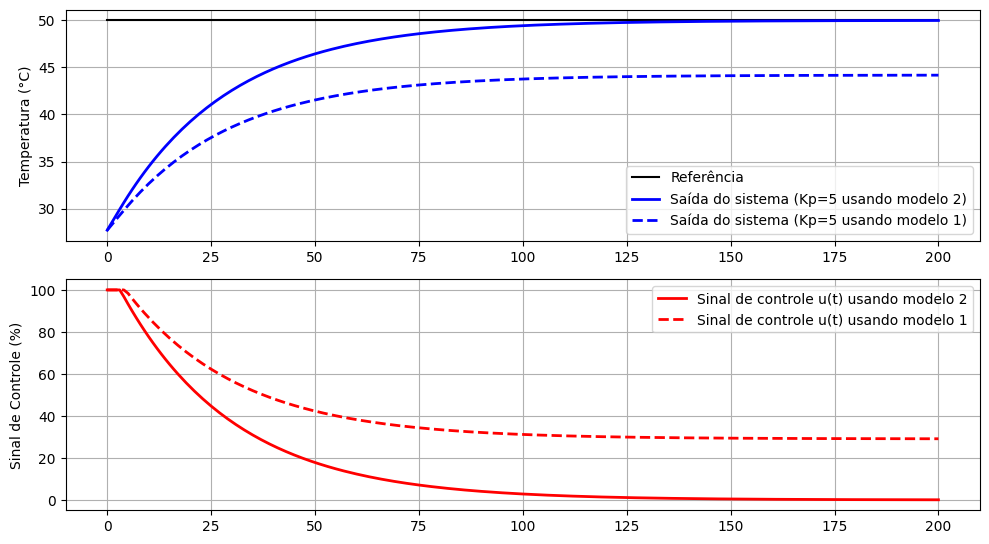

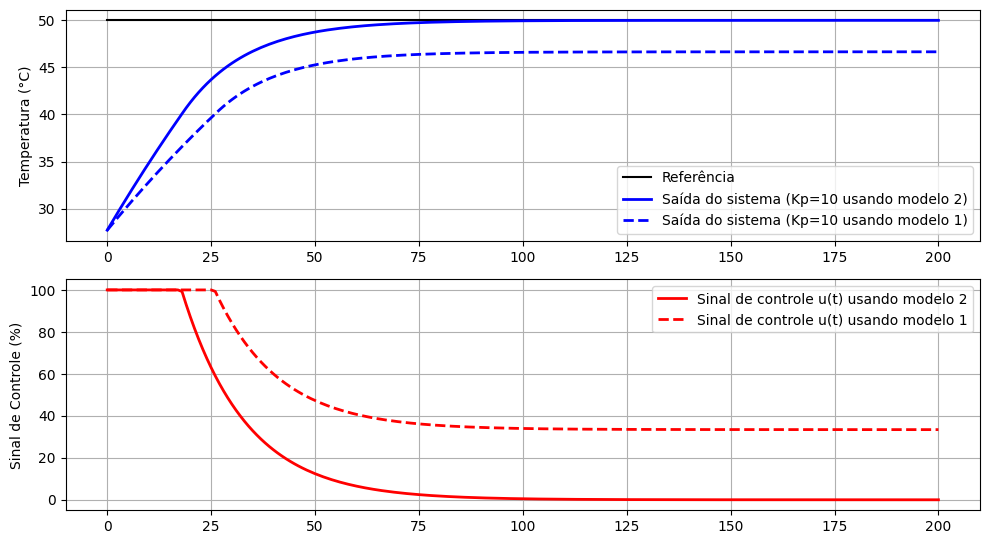

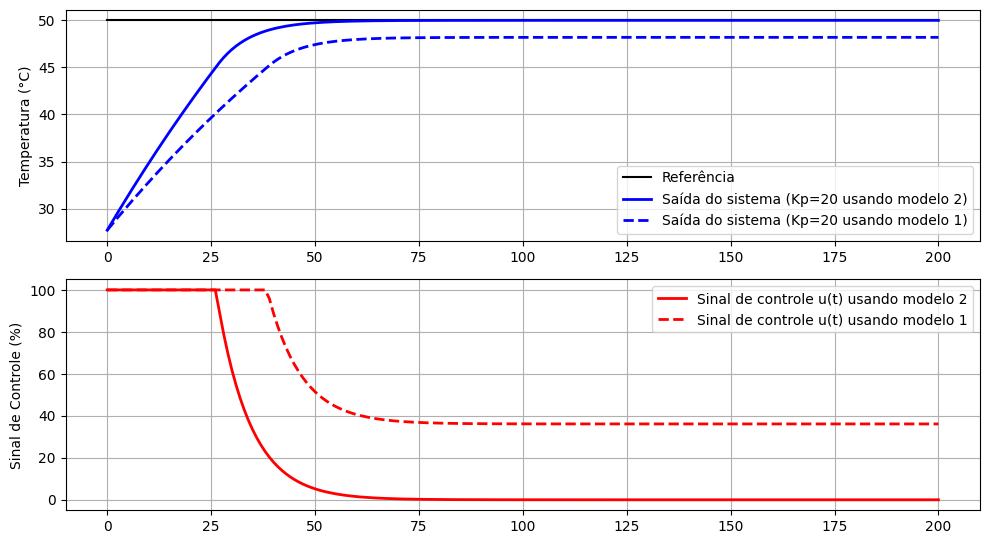

In [41]:
# Coloque o código/comentários AQUI


# Coloque o código AQUI

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parâmetros do sistema
K = K_S1           # Ganho do sistema, obtido no Ponto 1
tau = τ_S1         # Constante de tempo do sistema, obtida no Ponto 1
T_ref = 50         # Temperatura de referência
T_final = 200      # Tempo total da simulação em segundos
T_s = 1            # Período de amostragem
n = int(np.round(T_final / T_s + 1))  # Número de amostras

# Valores de Kp para o controlador
Kp_values = [1, 5, 10, 20]

# Função que descreve o modelo de primeira ordem
def modelo(y, t, u, k, tau):
    dydt = -(y-yinit)/tau + (k/tau)*u
    return dydt

def modelo2(y2, t, u2, K, tau):
    dydt = -(y2 - T_ref) / tau + (K / tau) * u2
    return dydt


# Loop para simular para cada valor de Kp
for Kp in Kp_values:
    # Inicializar variáveis
    t = np.linspace(0, T_final, n)
    y = np.zeros(n)
    u = np.zeros(n)
    e = np.zeros(n)

    # Condição inicial
    y[0] = T0_S1
    
    # Simulação em malha fechada
    for i in range(0, n - 1):
        # Calcular erro
        e[i] = T_ref - y[i]
        
        # Controlador P
        u[i] = Kp * e[i]
        
        # Saturação do controle
        u[i] = min(100, max(0, u[i]))
        
        # Integrar o modelo diferencial
        tspan = [t[i], t[i + 1]]
        y[i + 1] = odeint(modelo, y[i], tspan, args=(u[i], K, tau))[-1]
    
    # Último valor do sinal de controle
    u[-1] = u[-2]
    
    # Parâmetros do sistema
    K = K_S1           # Ganho do sistema, obtido no Ponto 1
    tau = τ_S1         # Constante de tempo do sistema, obtida no Ponto 1
    T_ref = 50         # Temperatura de referência
    T_final = 200      # Tempo total da simulação em segundos
    T_s = 1            # Período de amostragem
    n = int(np.round(T_final / T_s + 1))  # Número de amostras

    t2 = np.linspace(0, T_final, n)
    y2 = np.zeros(n)
    u2 = np.zeros(n)
    e2 = np.zeros(n)

    # Condição inicial
    y2[0] = T0_S1
    
    # Simulação em malha fechada
    for i in range(0, n - 1):
        # Calcular erro
        e2[i] = T_ref - y2[i]
        
        # Controlador P
        u2[i] = Kp * e2[i]
        
        # Saturação do controle
        u2[i] = min(100, max(0, u2[i]))
        
        # Integrar o modelo diferencial
        tspan = [t2[i], t2[i + 1]]
        y2[i + 1] = odeint(modelo2, y2[i], tspan, args=(u2[i], K, tau))[-1]
    
    # Último valor do sinal de controle
    u2[-1] = u2[-2]

    # Plotar a resposta do sistema para o Kp atual
    plt.figure(figsize=(10, 8))
    
    # Subplot 1: Temperatura e referência
    plt.subplot(3, 1, 1)
    plt.plot(t, np.ones(n) * T_ref, 'k-', label='Referência')
    plt.plot(t, y2, 'b-', linewidth=2, label=f'Saída do sistema (Kp={Kp} usando modelo 2)')
    plt.plot(t, y, 'b--', linewidth=2, label=f'Saída do sistema (Kp={Kp} usando modelo 1)')

    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.grid()

    # Subplot 2: Sinal de controle u(t)
    plt.subplot(3, 1, 2)
    plt.plot(t, u2, 'r-', linewidth=2, label='Sinal de controle u(t) usando modelo 2')
    plt.plot(t, u, 'r--', linewidth=2, label='Sinal de controle u(t) usando modelo 1')

    plt.ylabel('Sinal de Controle (%)')
    plt.legend()
    plt.grid()
    

    plt.tight_layout()
    plt.show()


# Comentários sobre os resultados

# Com o primeiro modelo, o sistema não apresenta um alinhamento exato com a referência de 50 graus Celsius, porque este modelo está focado na codição inicial (temperatura inicial). E mesmo com o aumento do ganho proporcional (Kp), o sistema não conseguiu atingir a referência de 50 graus Celsius. Isto não significa que não exista ganho proporcional que permita atingir a referência, mas sim que vai precisar de um valor de Kp muito mais alto para que o sistema consiga atingir a referência.
# Já com o segundo modelo, vemos que apenas para kp=1 o sistema não consegue atingir a referência de 50 graus Celsius. Isto acontece porque o segundo modelo é mais preciso e consegue atingir a referência de 50 graus Celsius com valores de Kp mais baixos. Além disso vemos que o sianl de controlo para todos os casos chega excepto para kp=1, chega a 0%. 

### 2.2	Controlo PI

Adicionando o controlo $P$ à integral do erro ($I$) obtemos o chamado controlo Proporcional e Integral ou simplesmente controlo **PI**. Este pode ser obtido através da equação (2) colocando o parâmetro $K_d=0$, resultando:

$$ u(t)=K_p\left(e(t) + \frac{1}{T_i}\int_{0}^{t}e(\tau) d\tau \right) =  K_p e(t) + \frac{K_p}{T_i}\int_{0}^{t}e(\tau) d\tau = P(t) + I(t) $$

Um possível algoritmo de controlo do controlador **PI** é dado por:

$$ P(k) = K_p e(k)$$
$$ v(k) = P(k) + I(k)$$
$$ u(k) = sat(v(k),u_{min},u_{max})$$
$$I(k+1) = I(k) + \frac{K_P T}{T_i}  e(k)$$


A figura seguinte apresenta o diagrama de blocos do sistema em malha fechada com um controlador **PI**.

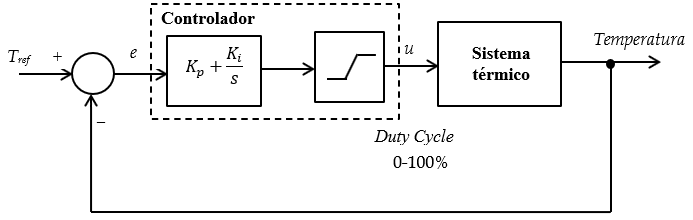




Para as experiências com o controlador **PI** utilize o sistema térmico 2 (sensor `S2`) do SERT. Neste caso, efetue o controlo do sistema durante um tempo de $t_{final}=600$ s. 


#### Ponto 1
Obtenha o comportamento do sistema SERT com um controlador **PI** para $K_p=5$  e $T_i=20,50,100$.

**a)**

Para cada valor da constante $T_i$ , apresente num gráfico a curva de resposta da temperatura do sistema térmico e num outro gráfico os correspondentes sinais de controlo $(u)$, valor da componente proporcional $(P)$ e valor da componente integrativa $(I)$. Explique os valores de cada um dos termos à medida que a temperatura sobe e estabiliza em torno da referência desejada. 

Temperatura inicial = 27.2 °C
Temperatura estabilizada = 53.15 °C
K = 0.519
t1 = 56.987700000000004 s
t2 = 138.5008 s
τ = 122.26964999999998 s
τd = 16.231150000000014


C:\Users\ruijs\AppData\Local\Temp\ipykernel_14184\4150510342.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[k+1] = odeint(modelo, y[k], [t[k], t[k+1]], args=(u[k], K, tau))[-1]


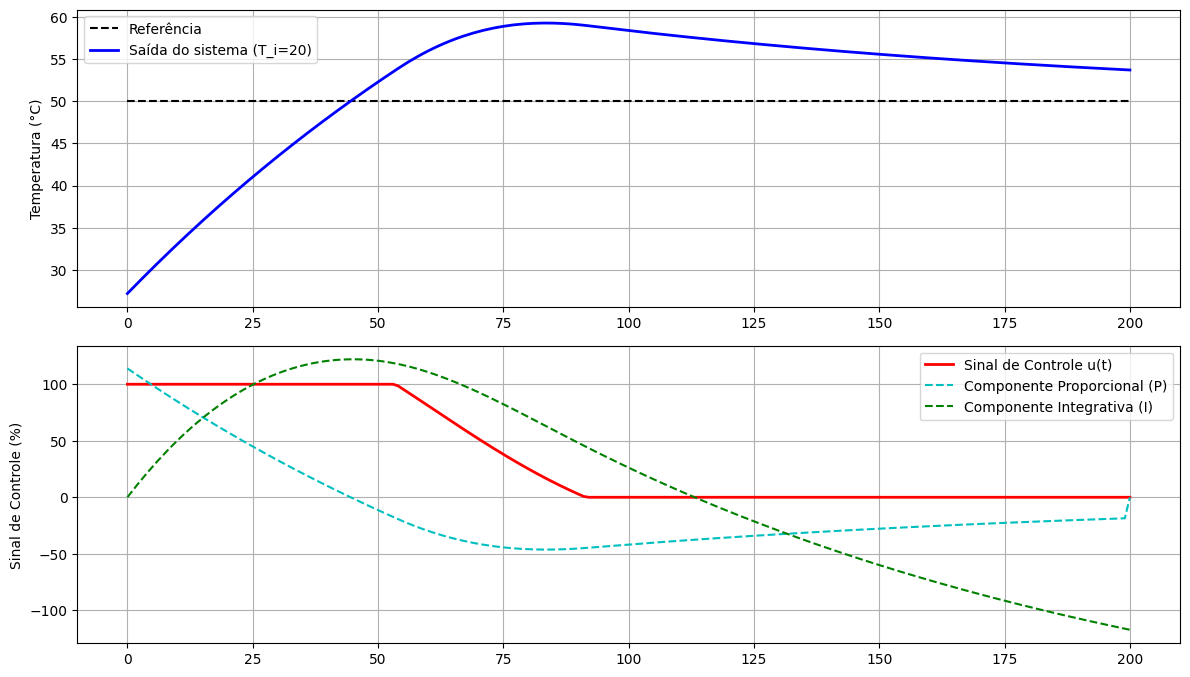

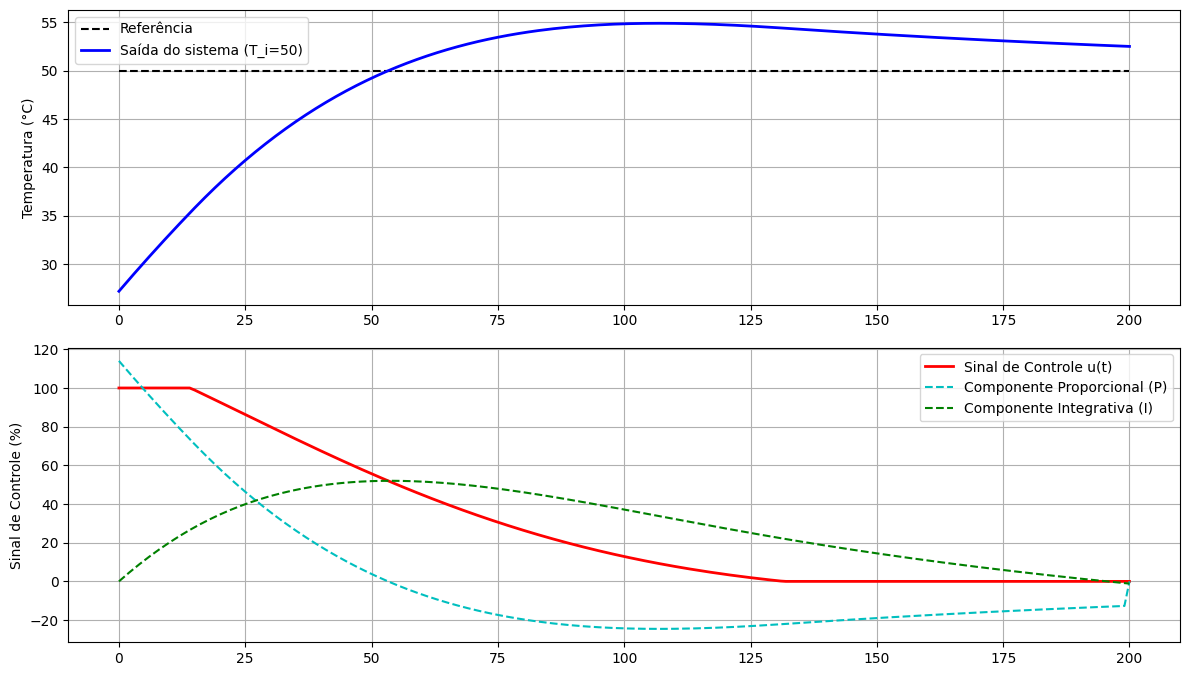

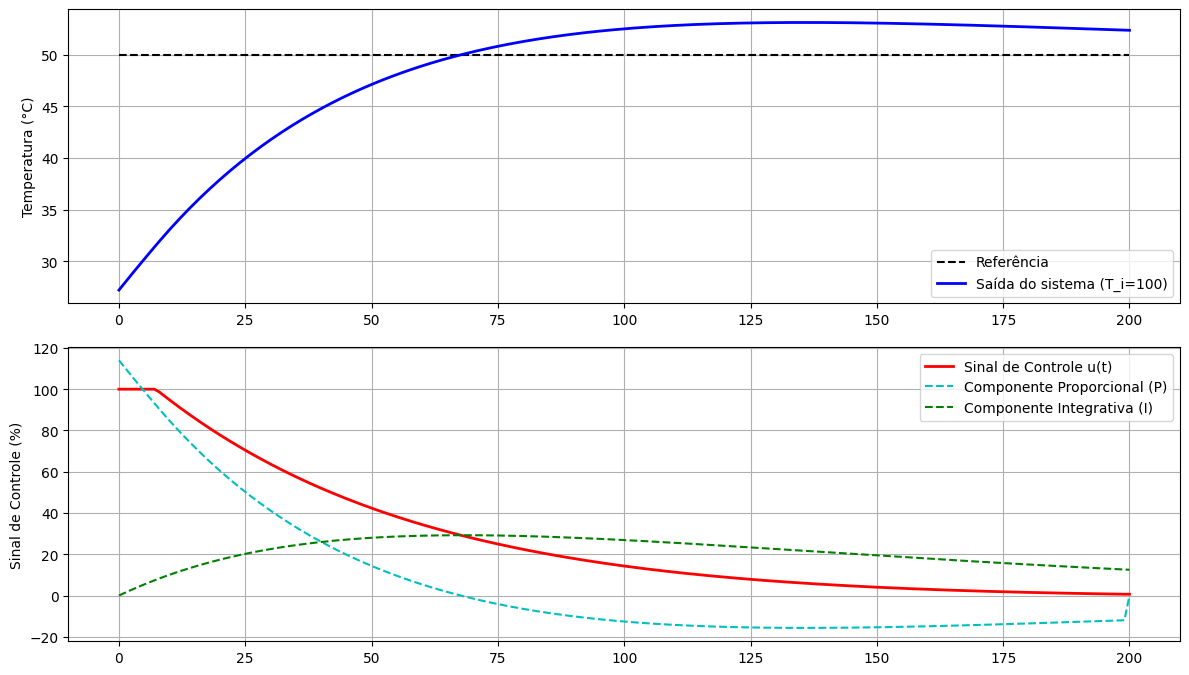

In [42]:
# Coloque o código/comentários AQUI


import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados do arquivo para análise
data = np.loadtxt('dados_S2.txt', delimiter=',', skiprows=1)

# Extrair os dados de tempo, entrada PWM e temperatura/y
tempo_S2 = data[:, 0]
pwm_S2 = data[:, 1]
temperatura_S2 = data[:, 2]


# Para se obter T0, basta pegar no primeiro valor dos dados experimentais obtidos para S1.
T0_S2 = temperatura_S2[0]
print(f"Temperatura inicial = {T0_S2} °C")
# Para se obter Tss, basta pegar no último valor dos dados experimentais obtidos para S1, já que temos a certeza que o mesmo pertence á temperatura estabilizada.
Tss_S2 = temperatura_S2[len(temperatura_S2)-1]
print(f"Temperatura estabilizada = {Tss_S2} °C")
# Para se obter ΔT, basta subtrair a temperatura estabilizada pela temperatura inicial.
ΔT_S2 = Tss_S2 - T0_S2
# Para se obter K, usamos ΔT/Δu (diferença entre a temperatura estabilizada e a temperatura inicial dividido por  variação do sinal de entrada).
############################################ VER ISTO QUANDO METO 0.5 e 1 ############################################
Δu_S2 = 50
K_S2 = ΔT_S2/Δu_S2
print(f"K = {K_S2}")

# Para se obter τ (tau)
# Temperaturas correspondentes a 28.3% e 63.2% de ΔT
T_283 = 0.283 * ΔT_S2 + T0_S2
T_632 = 0.632 * ΔT_S2 + T0_S2

# Interpolação para encontrar t1 e t2
f_interp = interp1d(temperatura_S2, tempo_S2)

# Encontrar os tempos correspondentes a essas temperaturas
t1 = f_interp(T_283)
t2 = f_interp(T_632)

print(f"t1 = {t1} s")
print(f"t2 = {t2} s")
# Calcular o valor de τ
τ_S2 = (3/2) * (t2 - t1)
print(f"τ = {τ_S2} s")

# Caucular τ_d 
τ_d_S2 = t2 - τ_S2
print(f"τd = {τ_d_S2}")



# Parâmetros do sistema
K = K_S2           # Ganho do sistema, obtido no Ponto 1
tau = τ_S2         # Constante de tempo do sistema, obtida no Ponto 1
T_ref = 50         # Temperatura de referência
T_final = 200      # Tempo total da simulação em segundos
T_s = 1            # Período de amostragem
n = int(np.round(T_final / T_s + 1))  # Número de amostras


Kp = 5             # ganho do controlador proporcional (P)

Ti_values = [20, 50, 100]  # Valores de T_i para experimentação

# Função que descreve o sistema térmico
def modelo(y, t, u, K, tau):
    dydt = -(y - T_ref) / tau + (K / tau) * u
    return dydt

# Loop para simulação com diferentes valores de T_i
for Ti in Ti_values:
    t = np.linspace(0, T_final, n)
    y = np.zeros(n)  # Temperatura do sistema
    u = np.zeros(n)  # Sinal de controle
    P = np.zeros(n)  # Componente proporcional
    I = np.zeros(n)  # Componente integrativa
    e = np.zeros(n)  # Erro

    # Condição inicial
    y[0] = T0_S2

    # Simulação do controlador PI
    for k in range(n - 1):
        
        # Calcular erro
        e[k] = T_ref - y[k]

        # Componente proporcional
        P[k] = Kp * e[k]

        # Componente integrativa acumulada
        I[k+1] = I[k] + (Kp * T_s / Ti) * e[k]

        # Controle total antes da saturação
        v = P[k] + I[k]

        # Saturação do sinal de controle
        u[k] = min(100, max(0, v))

        # Integrar o sistema térmico
        y[k+1] = odeint(modelo, y[k], [t[k], t[k+1]], args=(u[k], K, tau))[-1]

    # Último valor de u
    u[-1] = u[-2]

    # Gráficos para cada valor de Ti
    plt.figure(figsize=(12, 10))

    # Subplot 1: Resposta de temperatura
    plt.subplot(3, 1, 1)
    plt.plot(t, np.ones(n) * T_ref, 'k--', label='Referência')
    plt.plot(t, y, 'b-', linewidth=2, label=f'Saída do sistema (T_i={Ti})')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.grid()

    # Subplot 2: Sinal de controle
    plt.subplot(3, 1, 2)
    plt.plot(t, u, 'r-', linewidth=2, label='Sinal de Controle u(t)')
    plt.plot(t, P, 'c--', linewidth=1.5, label='Componente Proporcional (P)')
    plt.plot(t, I, 'g--', linewidth=1.5, label='Componente Integrativa (I)')
    plt.ylabel('Sinal de Controle (%)')
    plt.legend()
    plt.grid()


    plt.tight_layout()
    plt.show()

**b)**

Esboce num gráfico as curvas de temperatura do sistema térmico e num outro gráfico os correspondentes sinais de controlo ($u$) para os diferentes valores da constante $T_i$ considerados. Explique o fenómeno que leva a saída a apresentar um "overshoot".

C:\Users\ruijs\AppData\Local\Temp\ipykernel_14184\1630816752.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[k+1] = odeint(modelo, y[k], [t[k], t[k+1]], args=(u[k], K, tau))[-1]


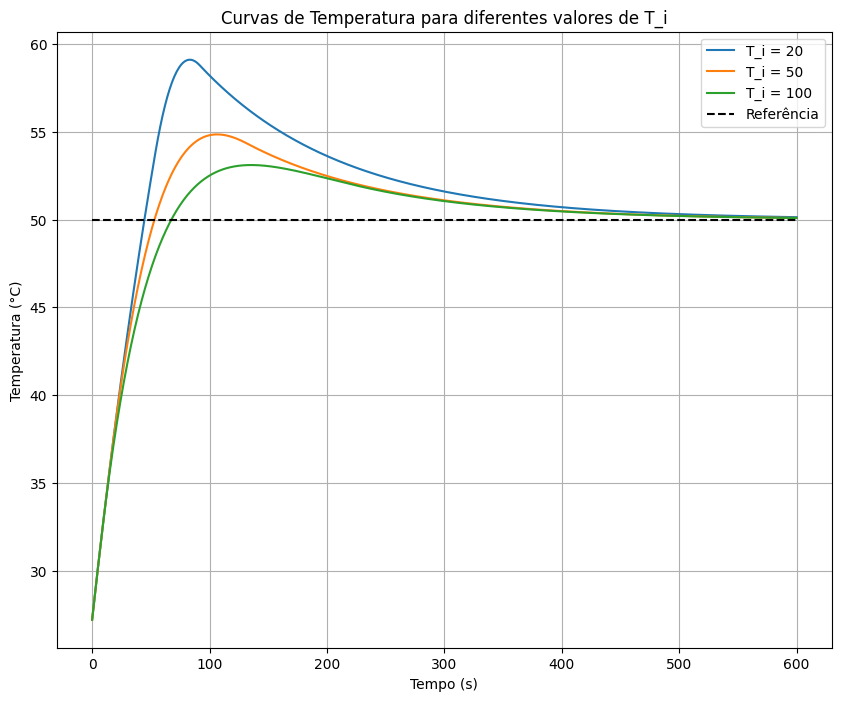

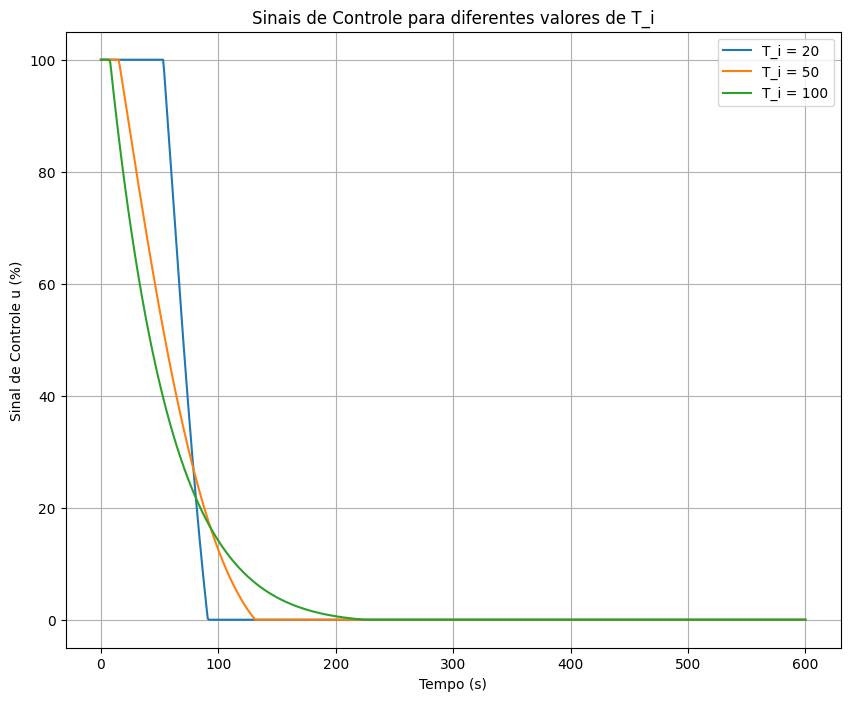

In [43]:
# Coloque o código/comentários AQUI
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definição do sistema térmico
K = K_S2  # Ganho do sistema
tau = τ_S2  # Constante de tempo do sistema
T_ref = 50  # Temperatura de referência
T_final = 600  # Tempo total da simulação em segundos
T_s = 1  # Período de amostragem
n = int(np.round(T_final / T_s + 1))  # Número de amostras

# Constantes de controle PI
Kp = 5
Ti_values = [20, 50, 100]  # Valores de T_i para experimentação

# Inicializar listas para armazenar dados de temperatura e controle para cada T_i
temperaturas = []
sinais_controle = []

# Loop para simulação com diferentes valores de T_i
for Ti in Ti_values:
    t = np.linspace(0, T_final, n)
    y = np.zeros(n)  # Temperatura do sistema
    u = np.zeros(n)  # Sinal de controle
    I = np.zeros(n)  # Componente integrativa
    e = np.zeros(n)  # Erro

    # Condição inicial
    y[0] = T0_S2

    # Simulação do controlador PI
    for k in range(n - 1):
        # Calcular erro
        e[k] = T_ref - y[k]

        # Componente proporcional e integrativa
        P = Kp * e[k]
        I[k+1] = I[k] + (Kp * T_s / Ti) * e[k]

        # Controle total antes da saturação
        v = P + I[k+1]

        # Saturação do sinal de controle
        u[k] = min(100, max(0, v))

        # Integrar o sistema térmico
        y[k+1] = odeint(modelo, y[k], [t[k], t[k+1]], args=(u[k], K, tau))[-1]

    # Último valor de u
    u[-1] = u[-2]

    # Guardar dados para gráfico
    temperaturas.append(y)
    sinais_controle.append(u)

# Gráfico 1: Curvas de temperatura para diferentes valores de T_i
plt.figure(figsize=(10, 8))
for i, Ti in enumerate(Ti_values):
    plt.plot(t, temperaturas[i], label=f'T_i = {Ti}')
plt.plot(t, np.ones(n) * T_ref, 'k--', label='Referência')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.title('Curvas de Temperatura para diferentes valores de T_i')
plt.grid()

# Gráfico 2: Sinais de controle para diferentes valores de T_i
plt.figure(figsize=(10, 8))
for i, Ti in enumerate(Ti_values):
    plt.plot(t, sinais_controle[i], label=f'T_i = {Ti}')
plt.xlabel('Tempo (s)')
plt.ylabel('Sinal de Controle u (%)')
plt.legend()
plt.title('Sinais de Controle para diferentes valores de T_i')
plt.grid()

plt.show()

#Como mostrado nos gráficos, valores menores de 𝑇𝑖 resultam em um aumento mais rápido e um overshoot mais pronunciado. Já valores maiores de 𝑇𝑖 tornam a resposta mais lenta e com menos overshoot, pois a contribuição do termo integrativo cresce mais devagar, reduzindo o efeito de "windup" e resultando numa resposta mais estável.

**c)**	

Indique quais as consequências de adicionar um controlo integral ao sistema.

In [44]:
# Insira os comentários AQUI


#Como o integrador acumula erro, ele pode aumentar o valor de saída para além do desejado, levando a um fenômeno de "overshoot" onde a saída ultrapassa temporariamente o valor de referência. Esse efeito pode levar a oscilações ou a um tempo de estabilização mais longo. Em sistemas que requerem respostas rápidas e precisas, esse comportamento pode ser indesejado e tornar o sistema menos estável.
#Se o tempo de integração Ti for grande, a contribuição da componente integral será menor, o que resulta numa resposta mais lenta do sistema. O ajuste de 𝑇𝑖 permite um equilíbrio entre a rapidez na eliminação do erro permanente e a redução do overshoot, melhorando a estabilidade da resposta.
#Resumo:

#Embora o controlo integral melhore a precisão do sistema ao eliminar o erro em regime permanente e tornar o sistema mais robusto a perturbações, ele pode introduzir overshoot e oscilações se não for bem ajustado. Um bom ajuste do tempo de integração 𝑇𝑖 e, em alguns casos, a implementação de técnicas anti-windup são essenciais para aproveitar os benefícios do controlo integral sem comprometer a estabilidade do sistema.

#### Ponto 2
Simule o sistema de controlo em malha fechada da temperatura usando um controlador **PI**, $C(s)=K_p+K_i/s$, conforme representado na figura seguinte. Para isso, utilize o modelo de primeira ordem com atraso identificado no Guião do Trabalho No. 1, com a função de transferência:

$$ G(s)=\frac{Y(s)}{U(s)}=\frac{Ke^{-\tau_Ds}}{τs+1} \tag{4}$$

e os parâmetros $(K, \tau, \tau_D)$ identificados do sistema SERT (sensor `S2`). 

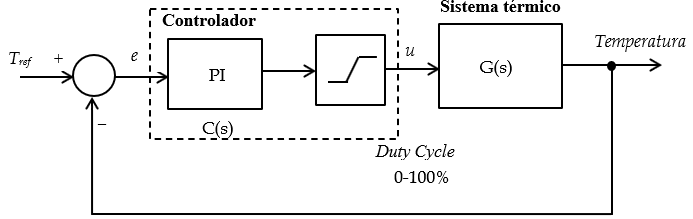

A correspondente equação diferencial é dada por:

$$ \tau \frac{dy(t)}{dt} + y(t) = K u(t-\tau_D)$$ 

**a)**

Apresente as curvas de resposta da temperatura do sistema simulado e dos correspondentes sinais de controlo ($u$) para os mesmos valores da constante  $T_i$  do controlador **PI** considerados no **Ponto 1**: $T_i=20,50,100$,  mantendo o ganho $K_p=5$.

In [45]:
# Coloque o código/comentários AQUI




**b)**

Compare as curvas de simulação (temperatura e sinal de controlo) obtidas em **a)** com as respostas experimentais do **Ponto 1**. Comente eventuais diferenças existentes entre ambas as respostas. 

In [46]:
# Coloque o código/comentários AQUI




#### Ponto 3
Faça a sintonia do controlador **PI** aplicando o método de Ziegler-Nichols 
(Z-N) em malha aberta. Para isso, utilize os parâmetros $(K,τ,τ_d)$ identificados do sistema SERT (sensor `S2`) referente ao modelo de primeira ordem com atraso (função de transferência (4)) identificado no Guião do Trabalho No. 1.

**a)**

Obtenha os parâmetros $(K_p, T_i)$ do controlador **PI**.

In [47]:
# Coloque o código AQUI




**b)**

Apresente a curva de resposta da temperatura do sistema térmico e do correspondente sinal de controlo ($u$) para as constantes de sintonia obtidas em **a)**.

In [48]:
# Coloque o código AQUI




**c)**

Comente o desempenho do controlador usando as constantes calculadas.

In [49]:
# Insira os comentários AQUI




#### Ponto 4
Faça a sintonia do controlador **PI** aplicando o método IMC. Para isso, utilize os parâmetros $(K,τ,τ_d)$   identificados do sistema SERT (sensor `S2`) referente ao modelo de primeira ordem com atraso (função de transferência (4)) identificado no Guião do Trabalho No. 1.

**a)**

Obtenha os parâmetros $(K_p, T_i)$ do controlador **PI** para os valores de 
$τ_C=τ⁄10$, $τ_C=τ⁄5$  e $τ_C=τ⁄2$.

In [50]:
# Coloque o código AQUI




**b)**

Apresente num gráfico as curvas de resposta da temperatura do sistema térmico e num outro gráfico os correspondentes sinais de controlo ($u$) para os parâmetros de sintonia calculados em **a)**.

In [51]:
# Coloque o código AQUI




**c)**

Comente o desempenho do controlador usando as referidas sintonias.

In [52]:
# Insira os comentários AQUI




#### Ponto 5
Existem diversos métodos para reduzir o efeito do *windup* verificado nas experiências anteriores. A figura seguinte apresenta um possível diagrama de um sistema em malha fechada com um controlador **PI** e um esquema
 *anti-windup*.

 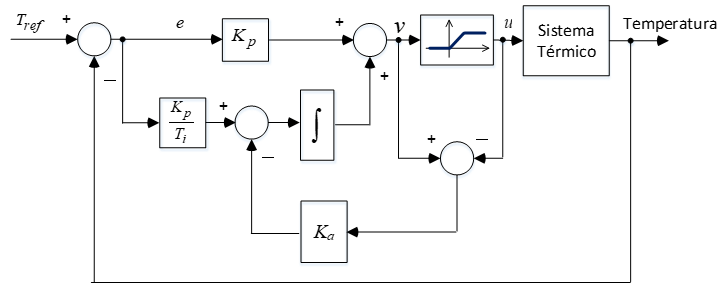

 O algoritmo do controlador **PI** com o esquema *anti-windup* é dado pelas seguintes equações:

$$ P(k) = K_p e(k)$$
$$ v(k) = P(k) + I(k)$$
$$ u(k) = sat(v(k),u_{min},u_{max})$$
$$I(k+1) = I(k) + \frac{K_P T}{T_i} e(k) + TK_a \left(u(k) - v(k)\right)$$
 

Para a realização das experiências, considere os parâmetros do controlador **PI** obtidos no **Ponto 3a)** usando o método de Ziegler-Nichols em malha aberta.

**a)**

Obtenha o comportamento do sistema SERT para os valores do ganho *anti-windup* $K_a = 0.02, 0.1, 0.2$. Para cada valor do ganho $K_a$, apresente num gráfico a curva de resposta da temperatura do sistema térmico e num outro gráfico os correspondentes sinal de controlo ($u$), valor da componente proporcional ($P$) e valor da componente integrativa ($I$). Explique a evolução de cada um dos sinais do sistema.

In [53]:
# Coloque o código/comentários AQUI




**b)**

Compare os resultados com o esquema *anti-windup* e sem o esquema *anti-windup*. Esboce num gráfico as curvas de temperatura do sistema térmico e num outro gráfico os sinais de controlo ($u$) aplicados ao sistema. Comente os resultados obtidos.

In [54]:
# Coloque o código/comentários AQUI


